## 1. WAP to implement a Perceptron using numpy in Python.

## Perceptron Implementation with Numpy

---
### Explanation:

1.  **Initialization**:
    
    -   `weights`: Initialized with zeros, including a bias weight.
    -   `learning_rate`: Determines the step size for weight updates.
    -   `epochs`: Number of iterations over the entire dataset.
2.  **Activation Function**:
    
    -   A step function that outputs 1 if the weighted sum is non-negative, otherwise 0.
3.  **Training (fit method)**:
    
    -   For each input, the perceptron predicts the output.
    -   The weights are updated based on the error (`y[i] - y_pred`) and the learning rate.
4.  **Prediction**:
    
    -   Computes the weighted sum of inputs and applies the activation function.
5.  **Example**:
    
    -   The program trains the perceptron on a basic AND logic gate dataset and predicts the outputs for the same inputs.


### Class Perceptron

In [ ]:
import numpy as np  # Imports numpy for numerical operations and array handling

class Perceptron:  # Defines the Perceptron class for implementing a single-layer neural network
    def __init__(self, input_size, learning_rate=0.01, epochs=100):  # Constructor initializing perceptron parameters
        self.weights = np.zeros(input_size + 1)  # Initializes weights with zeros (+1 for the bias term)
        self.learning_rate = learning_rate  # Stores the learning rate that controls the magnitude of weight updates
        self.epochs = epochs  # Stores the number of epochs (iterations over the entire dataset)

    def activation_function(self, x):  # Defines the activation function (step function)
        return 1 if x >= 0 else 0  # Returns 1 if input is non-negative, otherwise returns 0 (binary output)

    def predict(self, x):  # Defines the prediction method for a single input
        z = np.dot(x, self.weights[1:]) + self.weights[0]  # Computes weighted sum: z = w0 (bias) + w1*x1 + w2*x2 + ...
        return self.activation_function(z)  # Applies activation function and returns the prediction

    def fit(self, X, y):  # Defines the training method that learns from input and output data
        for _ in range(self.epochs):  # Loops through the dataset for the specified number of epochs
            for i in range(len(X)):  # Loops through each training sample
                x_i = X[i]  # Gets the current input sample
                y_pred = self.predict(x_i)  # Computes the predicted output using current weights
                update = self.learning_rate * (y[i] - y_pred)  # Calculates the weight update based on error and learning rate
                self.weights[1:] += update * x_i  # Updates the feature weights using Hebbian learning rule
                self.weights[0] += update  # Updates the bias term separately

### Example usage:

In [ ]:
if __name__ == "__main__":  # Checks if the script is run directly (not imported as a module)
    # Define training data (AND logic gate example)
    X = np.array([  # Creates input data for AND gate (all possible 2-bit combinations)
        [0, 0],  # First input combination
        [0, 1],  # Second input combination
        [1, 0],  # Third input combination
        [1, 1]   # Fourth input combination
    ])

    y = np.array([0, 0, 0, 1])  # Output for AND gate (1 only when both inputs are 1)
    #y = np.array([0, 1, 1, 1])  # Output for OR gate (commented out - alternative logic gate)
    #y = np.array([1, 0, 0, 1])  # Output for XOR gate (commented out - alternative logic gate)

    # Create and train the perceptron
    perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)  # Instantiates a perceptron with 2 inputs, learning rate 0.1, and 10 epochs
    perceptron.fit(X, y)  # Trains the perceptron on the AND gate data

    # Test the perceptron
    for x in X:  # Loops through each training input
        print(f"Input: {x}, Predicted Output: {perceptron.predict(x)}")  # Prints the input and its predicted output

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


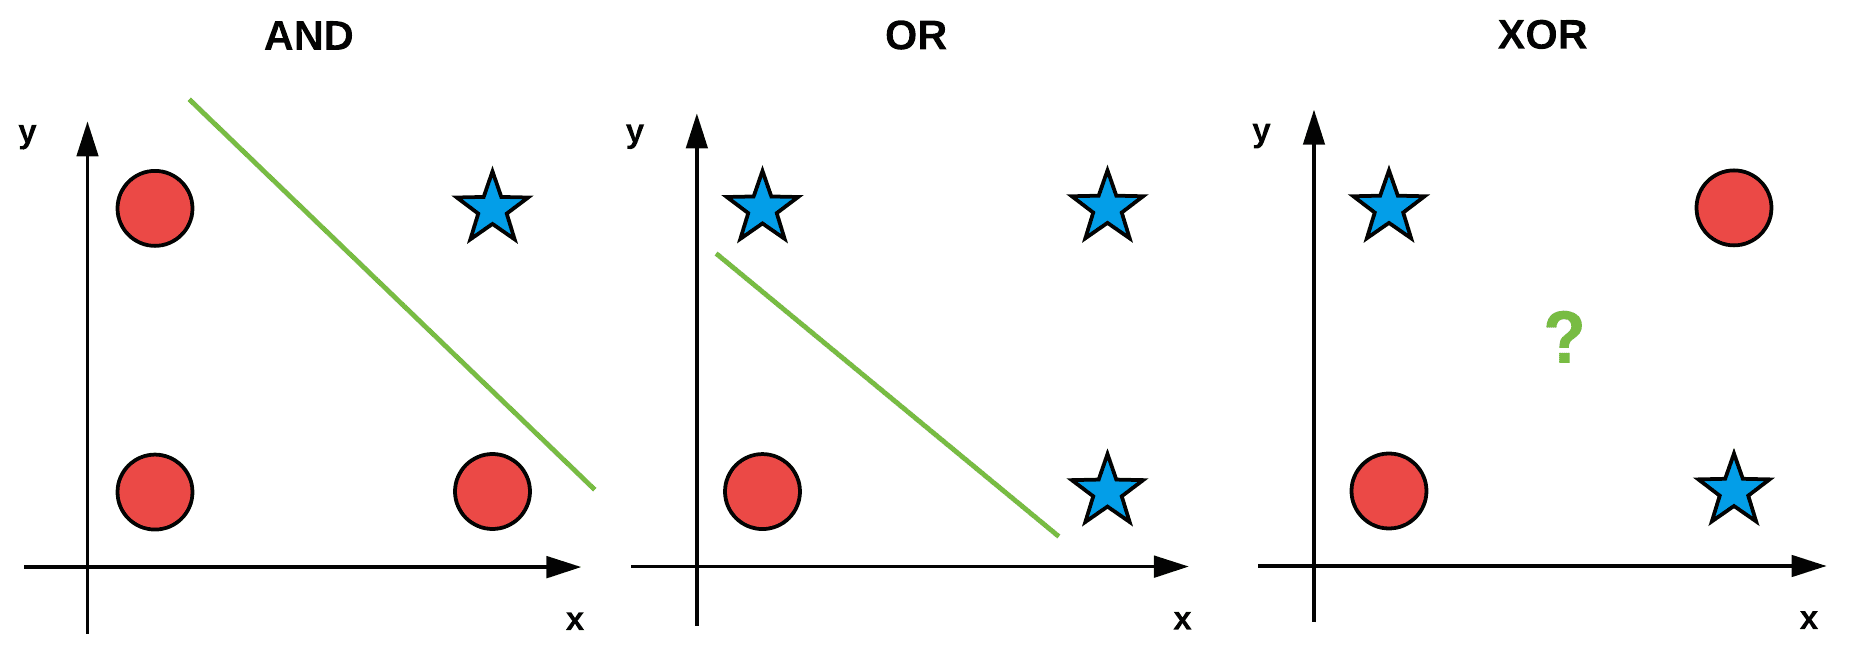